# 📊 S&P 500 Companies: Financial Performance Analysis

### **Project Title:**  
**Exploring Sector-Level Financial Trends in the S&P 500 using Bootstrapping & Statistical Inference**

**Dataset Source:**  [Kaggle – S&P 500 Companies with Financial Information](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information/data)

**Author:**  Kavya Khanna

**Course:**  SEIS 631 – Data Preparation & Analysis (Fall 2025)

**Goal:**  Use real-world financial data to assess and compare key sector metrics, with uncertainty estimation using bootstrapping.

**Background:** S&P 500 stands for the Standard & Poor’s 500 Index.
It is a stock market index that tracks the performance of 500 large, publicly traded companies listed on U.S. stock exchanges.
These companies span 11 sectors, including technology, healthcare, energy, financials, etc.
It is one of the most widely used benchmarks for the overall performance of the U.S. stock market and economy.
**Key Financial Metrics Explained:**
EBITDA → profitability

Earnings/Share → per-share profit

Price/Earnings → valuation

Dividend Yield → investor return

Market Cap → company size

In [2]:
#Import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df=pd.read_csv('C:\\Users\\Kavya\\OneDrive - University of St. Thomas\\Desktop\\SEISS-631-02\\assignment-clt-kavyakhanna-1\\financials.csv')
pd.options.display.float_format = '{:,.2f}'.format
df.drop(columns=['Price/Book'], inplace=True)
df['Price/Earnings'].fillna(df['Price/Earnings'].median())
df.duplicated().sum() #no duplicates 
df.select_dtypes(include='object').columns #check all object data type columns


Index(['Symbol', 'Name', 'Sector', 'SEC Filings'], dtype='object')

In [3]:
df.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,"138,721,055,226.00","9,048,000,000.00",4.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.92,"10,783,419,933.00","601,000,000.00",3.58,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,"102,121,042,306.00","5,744,000,000.00",3.74,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,"181,386,347,059.00","10,310,000,000.00",6.29,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,"98,765,855,553.00","5,643,228,000.00",2.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.43,1.28,74.94,38.93,"52,518,668,144.00","2,704,000,000.00",10.60,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.35,7.43,225.36,142.00,"6,242,377,704.00","587,800,000.00",1.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.00,3.39,204.45,114.45,"94,550,214,268.00","2,538,040,000.00",13.09,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.22,6.19,169.55,78.81,"8,123,611,867.00","853,941,000.00",1.13,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.00,0.03,15.65,9.70,"11,191,663,795.00","339,000,000.00",2.11,http://www.sec.gov/cgi-bin/browse-edgar?action...


**Sector wise profit analysis (using EBITDA)**

In [4]:
#sector wise profit using median 
sector_profit = df.groupby('Sector')['EBITDA'].agg(['median']).round(2)
sector_profit = sector_profit.sort_values(by='median', ascending=False)
sector_profit


,median
Sector,
Telecommunication Services,"45,745,000,000.00"
Consumer Staples,"3,011,012,500.00"
Utilities,"2,895,500,000.00"
Energy,"2,407,000,000.00"
Materials,"2,152,000,000.00"
Consumer Discretionary,"1,962,093,500.00"
Health Care,"1,676,204,000.00"
Information Technology,"1,667,542,000.00"
Industrials,"1,635,916,000.00"


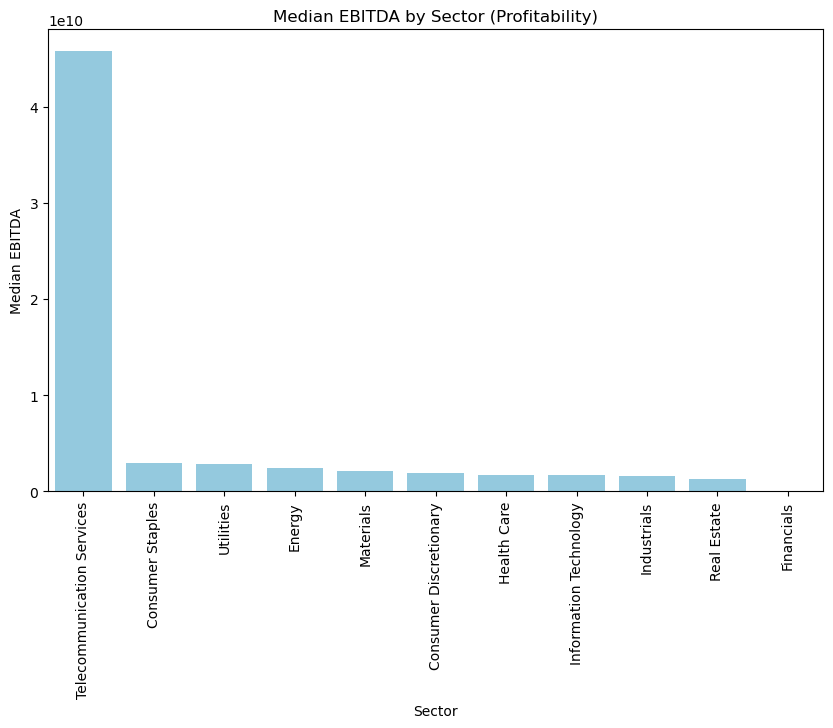

In [5]:

plt.figure(figsize=(10,6))
sns.barplot(x=sector_profit.index, y=sector_profit['median'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Median EBITDA by Sector (Profitability)')
plt.ylabel('Median EBITDA')
plt.show()

The bar chart illustrates the median EBITDA across various sectors in S&P 500 Companies. The technology sector shows the highest profit as compared to the other sectors. However, Financial is the only sector with no profitability indicating loss in that sector. 

**Do only larger companies earn more profit in tech sectors?** ( need to come back here)

In [12]:
#find the highest market cap company in tech sector 
tech_companies=df[df['Sector']=='Telecommunication Services']
tech_companies=df[df['Sector']=='Telecommunication Services'].sort_values(by='Market Cap', ascending=False).head(10)
tech_companies



,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,SEC Filings
58,T,AT&T Inc,Telecommunication Services,35.57,12.14,5.42,4.76,42.70,32.55,"226,713,270,000.00","49,653,000,000.00",1.41,http://www.sec.gov/cgi-bin/browse-edgar?action...
474,VZ,Verizon Communications,Telecommunication Services,49.04,13.08,4.63,7.36,54.77,42.80,"208,092,277,044.00","45,745,000,000.00",1.65,http://www.sec.gov/cgi-bin/browse-edgar?action...
99,CTL,CenturyLink Inc,Telecommunication Services,16.20,8.35,12.66,1.16,27.61,13.16,"18,237,196,861.00","5,577,000,000.00",1.48,http://www.sec.gov/cgi-bin/browse-edgar?action...


**Hypothesis Testing**
**Null Hypothesis:** There is no difference in EBIDTA mean for telecommunication companies and mean EBIDTA for companies in all sectors.
**Alternative Hypothesis:** There is a difference in EBIDTA mean for telecommunication companies and mean EBIDTA for companies in all sectors.


 Fail to reject the null hypothesis with p-value: 0.515


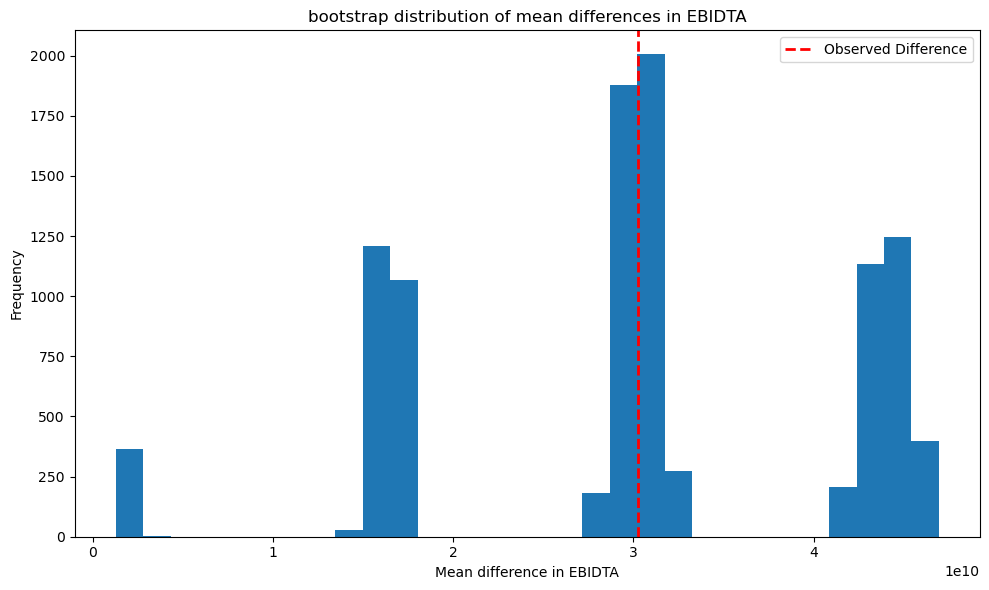

In [29]:
#Saperate the telecommunication and all other sectors
telecom_df=df[df['Sector']=='Telecommunication Services'].copy()
all_sector_df=df[df['Sector']!='Telecommunication Services'].copy()

#extract the EBIDTA values for both groups 
telecom_df_ebidta=telecom_df['EBITDA'].dropna().values
all_sector_df_ebidta=all_sector_df['EBITDA'].dropna().values

#calculate observed difference in means
observed_diff=np.mean(telecom_df_ebidta)- np.mean(all_sector_df_ebidta)
observed_diff

#Bootstrap: Resample with replacement to estimate the sampling distribution 
num=10000
boot_mean_diff=[]

for i in range(num):
    boot_telecom=np.random.choice(telecom_df_ebidta,size=len(telecom_df_ebidta),replace=True)
    boot_others=np.random.choice(all_sector_df_ebidta,size=len(all_sector_df_ebidta),replace=True)
    boot_mean_diff.append(np.mean(boot_telecom)- np.mean(boot_others))

boot_mean_diff=np.array(boot_mean_diff)
#calculate p-value
p_value=np.sum(np.abs(boot_mean_diff)>=np.abs(observed_diff))/num
if p_value <=0.05:
    print(f'Reject the null hypothesis wiht p-value:{ p_value}')
else:
    print(f' Fail to reject the null hypothesis with p-value: {p_value}')

#visualize the boootstrap distribution
plt.figure(figsize=(10,6))
plt.hist(boot_mean_diff, bins=30)  
plt.axvline(observed_diff,color='red',linestyle='dashed',linewidth=2,label='Observed Difference')
plt.title('bootstrap distribution of mean differences in EBIDTA')
plt.xlabel('Mean difference in EBIDTA')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()